Willian de Mattos

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math
import numpy as np
import gradient_descent as gd

In [2]:
def mean(x):
    return sum(x) / len(x)
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def dot(v, w):
    return sum(v_i * w_i
        for v_i, w_i in zip(v, w))
def sum_of_squares(x):
    return sum([x_i * x_i for x_i in x])
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
    return math.sqrt(variance(x))
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return

In [3]:
def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return gd.minimize_stochastic(squared_error,
                            squared_error_gradient,
                            x, y,
                            beta_initial,
                            0.001)

In [4]:
def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)
def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2
def squared_error_gradient(x_i, y_i, beta):
    """the gradient (with respect to beta) corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta) for x_ij in x_i]


In [5]:
def predict(x_i, beta):
    """assumes that the first element of each x_i is 1"""
    return dot(x_i, beta)

In [6]:
house_y = np.genfromtxt('kc_house_data.csv', missing_values=0, delimiter=',', skip_header=1, usecols=[2])
house_y = np.log(house_y)

house_x = np.genfromtxt('kc_house_data.csv', missing_values=0.0001, delimiter=',', skip_header=1, usecols=[5,12,19])
house_x = np.log(house_x)
house_x.shape

(21613, 3)

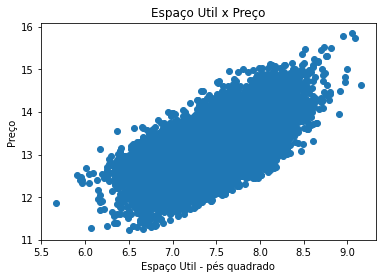

In [7]:
plt.scatter(house_x[:,1], house_y)
plt.title("Espaço Util x Preço")
plt.ylabel("Preço")
plt.xlabel("Espaço Util - pés quadrado")
plt.show()

In [8]:
house_x = np.insert(house_x, 0, values=int(1), axis=1)
random.seed(0)
beta_house = estimate_beta(house_x, house_y)

<ipython-input-4-0f51903901fa>:7: RuntimeWarning: overflow encountered in double_scalars
  return [-2 * x_ij * error(x_i, y_i, beta) for x_ij in x_i]


In [9]:
print(beta_house)

[0.8444218515250481, 0.7579544029403025, 0.420571580830845, 0.25891675029296335]


In [10]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))
def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                                for x_i, y_i in zip(x, y))
    return 1.0 - (sum_of_squared_errors / total_sum_of_squares(y))

In [11]:
print("R2 =", multiple_r_squared(house_x, house_y, beta_house))

R2 = -6.934884486981118
